## Data620 - FINAL PROJECT 

**Group Memebers : Vijaya Cherukuri, Abdellah Ait Elmouden, Priya Shaji, Habib Khan**

### Introduction

Social  networks  are  the  main  resources  to  gather information   about   people’s   opinion   and   sentiments   towards different  topics  as  they  spend  hours  daily  on social  media and share   their   opinion. In   this   project   we   show   the application of sentimental analysis and how to connect to Twitter and  run  sentiment analysis  queries, based on News Topics during COVID-19.

### Motivation

Six months since the first COVID-19 case in the United States, and 113+ days into the earliest Lockdown Order of New York City, now the city reopen the time some other states see coronavirus cases rise. how have people been feeling through this special time? Do we know how others are responding to the pandemic? The Corona Virus endangers our physical health indeed, but alongside, social distancing also poses a threat to our emotional stability. Thus, it is crucial to understand public sentiments under COVID-19. To analyze these we'll use Sentiment Analysis on tweets to aid the understanding of sentiment trends.

As of now Covid-19 is one of the top trending topics. Presently it stands in 7th position in the twitter hot topics.

![alt text](Twittertrend.png)

### Data Source

We will be using the Twitter API, as our tool to collect data for this analysis. Twitter is a gold mine of data. Unlike other social platforms, almost every user’s tweets are completely public and pullable. This is a huge plus if you’re trying to get a large amount of data to run analytics on.

![alt text](twitter.png)

### Sentiment Analysis

Note: Results will differ each time the program runs as Network and Sentiment analysis is done in a dynamic dataset.

Import required Libraries

In [47]:
#import nltk
#nltk.download('vader_lexicon')
#pip install tweepy
#pip install textblob
#pip install nxviz as nv
#from nltk.corpus import stopwords
#from nltk.stem.wordnet import WordNetLemmatizer
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#import nltk
#nltk.download('wordnet')

import pandas as pd
import re
import textblob
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import nltk
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
import warnings
warnings.filterwarnings('ignore')

Connect to Twitter using 'consumer key', 'consumer secret', 'access token', 'access token secret'

In [48]:
consumer_key='lub2vXiqJXY5JVYTtxaQWvshE'
consumer_secret='o4tRCRf1YWo1WdrQzx1xNhuSvOIshguPZNx86U9UVCaNzsLPEF'
access_token='165276006-rCCM1Nt4txkpxMa01RJLUuq7WrF9sREqxHFApiUm'
access_token_secret='lf2SmfrfrIBd2aiYmq24oPfXVlZSLBamJDEMjM5eHtvkE'

Set API path

In [49]:
auth =  tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
public_tweets = api.search('Covid_19')

Search for tweets related to Covid 

In [50]:

search_term = "#Covid -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-03-25').items(1000)

Convert twitter data into a dataframe

In [51]:

json_data = [r._json for r in tweets]
df = pd.io.json.json_normalize(json_data)


Analyze the dataset

In [52]:
df.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates
0,Sun Jul 19 15:58:52 +0000 2020,1284880393825431554,1284880393825431554,Indian-Origin Doctors Warn Racial Bias In Rese...,True,"<a href=""https://hocalwire.com"" rel=""nofollow""...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Jul 19 15:58:51 +0000 2020,1284880387890728961,1284880387890728961,U.S. breaks single-day record of new #COVID-19...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Jul 19 15:58:30 +0000 2020,1284880301370613761,1284880301370613761,"Beginning July 15, all non-business travellers...",True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 19 15:58:27 +0000 2020,1284880287571120128,1284880287571120128,keeping @realDonaldTrump honest—or trying to r...,True,"<a href=""http://twitter.com/download/iphone"" r...",1.284880e+18,1284880285792780289,16988654.0,16988654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sun Jul 19 15:57:56 +0000 2020,1284880157430423553,1284880157430423553,@comicrelief 'We take the decision on which co...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,226105842.0,226105842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to do Sentiment anaysis on the dataframe, we will keep only one column "texts" an drop other columns not required for sentiment analysis

Create a new column 'Tweets' 

In [53]:

df['Tweets'] = df['text']

Create a new dataframe object "df_SentimentAnalysis" to preserve the original dataset "df" 

In [54]:

df_SentimentAnalysis = df

df_SentimentAnalysis.head() ## added new column "Tweets"

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,Tweets
0,Sun Jul 19 15:58:52 +0000 2020,1284880393825431554,1284880393825431554,Indian-Origin Doctors Warn Racial Bias In Rese...,True,"<a href=""https://hocalwire.com"" rel=""nofollow""...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian-Origin Doctors Warn Racial Bias In Rese...
1,Sun Jul 19 15:58:51 +0000 2020,1284880387890728961,1284880387890728961,U.S. breaks single-day record of new #COVID-19...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U.S. breaks single-day record of new #COVID-19...
2,Sun Jul 19 15:58:30 +0000 2020,1284880301370613761,1284880301370613761,"Beginning July 15, all non-business travellers...",True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Beginning July 15, all non-business travellers..."
3,Sun Jul 19 15:58:27 +0000 2020,1284880287571120128,1284880287571120128,keeping @realDonaldTrump honest—or trying to r...,True,"<a href=""http://twitter.com/download/iphone"" r...",1.284880e+18,1284880285792780289,16988654.0,16988654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,keeping @realDonaldTrump honest—or trying to r...
4,Sun Jul 19 15:57:56 +0000 2020,1284880157430423553,1284880157430423553,@comicrelief 'We take the decision on which co...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,226105842.0,226105842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@comicrelief 'We take the decision on which co...


Drop all other columns except "Tweets" for sentiment analysis

In [55]:
drop_list = ["Tweets"]
df_SentimentAnalysis = df_SentimentAnalysis.drop(df_SentimentAnalysis.columns.difference(drop_list), axis=1)

Analyze the dataset

In [56]:
df_SentimentAnalysis.head()

,Tweets
0,Indian-Origin Doctors Warn Racial Bias In Rese...
1,U.S. breaks single-day record of new #COVID-19...
2,"Beginning July 15, all non-business travellers..."
3,keeping @realDonaldTrump honest—or trying to r...
4,@comicrelief 'We take the decision on which co...


### Data Preprocessing

Create a function to clean the tweets

In [57]:


def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df_SentimentAnalysis['Tweets'] = df_SentimentAnalysis['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df_SentimentAnalysis

,Tweets
0,Indian-Origin Doctors Warn Racial Bias In Rese...
1,U.S. breaks single-day record of new COVID-19 ...
2,"Beginning July 15, all non-business travellers..."
3,keeping honest—or trying to regardless of tho...
4,'We take the decision on which companies... w...
...,...
995,That’s good. Now we can go back to worrying ab...
996,Crazy visuals from a COVID ward at a hospital ...
997,Something to think about as society loosens up...
998,gpt3 AI COVID a short (and scary) bedtime stor...


### Data Exploration

Now lets explore our data based on subjectivity and polarity

#### "Subjectivity" (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) 

#### "Polarity" (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).


Create a function to get the subjectivity and polarity abd further create two new columns to analysze our dataframe

In [58]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df_SentimentAnalysis['Subjectivity'] = df_SentimentAnalysis['Tweets'].apply(getSubjectivity)
df_SentimentAnalysis['Polarity'] = df_SentimentAnalysis['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df_SentimentAnalysis

,Tweets,Subjectivity,Polarity
0,Indian-Origin Doctors Warn Racial Bias In Rese...,0.700000,-0.400000
1,U.S. breaks single-day record of new COVID-19 ...,0.454545,0.136364
2,"Beginning July 15, all non-business travellers...",0.454545,0.136364
3,keeping honest—or trying to regardless of tho...,0.000000,0.000000
4,'We take the decision on which companies... w...,0.866667,-0.433333
...,...,...,...
995,That’s good. Now we can go back to worrying ab...,0.343750,0.093750
996,Crazy visuals from a COVID ward at a hospital ...,0.594444,-0.377778
997,Something to think about as society loosens up...,0.400000,-0.200000
998,gpt3 AI COVID a short (and scary) bedtime stor...,0.650000,-0.250000


#### Let’s see how well the sentiments are distributed. 
#### A good way to accomplish this task is by understanding the common words by plotting word clouds.

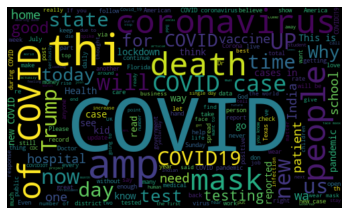

In [59]:
# word cloud visualization
allWords = ' '.join([twts for twts in df_SentimentAnalysis['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### "Covid" and "Mask" are the most used words related to covid tweets.This result will vary each time we run the code

In [60]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
df_SentimentAnalysis['Analysis'] = df_SentimentAnalysis['Polarity'].apply(getAnalysis)
# Show the dataframe
    
df_SentimentAnalysis
    
    

,Tweets,Subjectivity,Polarity,Analysis
0,Indian-Origin Doctors Warn Racial Bias In Rese...,0.700000,-0.400000,Negative
1,U.S. breaks single-day record of new COVID-19 ...,0.454545,0.136364,Positive
2,"Beginning July 15, all non-business travellers...",0.454545,0.136364,Positive
3,keeping honest—or trying to regardless of tho...,0.000000,0.000000,Neutral
4,'We take the decision on which companies... w...,0.866667,-0.433333,Negative
...,...,...,...,...
995,That’s good. Now we can go back to worrying ab...,0.343750,0.093750,Positive
996,Crazy visuals from a COVID ward at a hospital ...,0.594444,-0.377778,Negative
997,Something to think about as society loosens up...,0.400000,-0.200000,Negative
998,gpt3 AI COVID a short (and scary) bedtime stor...,0.650000,-0.250000,Negative


Now let's analyze sentiments features of the dataframe

Display positive tweets 

In [61]:

print('Displaying positive tweets:\n')
j=1
sortedDF = df_SentimentAnalysis.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1
    if(j==5):
        break

Displaying positive tweets:

1) U.S. breaks single-day record of new COVID-19 cases 9 times in a month  coronavirus

2) Beginning July 15, all non-business travellers 12 years of age and over, from Arizona, Florida, New York &amp; Texas in… 

3) Dear  it's good that pvt hospitals have been asked to reserve 50% beds for COVID patients. But if these hos… 

4) interesting point regarding the swineflu 
via _4_Trump
I guess the global politicians hijacked COVID to… 



Display negative tweets  

In [62]:

print('Displaying negative tweets:\n')
j=1
sortedDF = df_SentimentAnalysis.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1
    if(j==5):
        break

Displaying negative tweets:

1) Indian-Origin Doctors Warn Racial Bias In Research Behind Covid-19 Disparity In UK London Indian-origindoctors… 

2)  'We take the decision on which companies... we partner with very seriously, and have a robust process… 

3) Your choice America. Wear a fucking mask. Thanks. 
wearamask covid america 

4)   We are 1 in dead from COVID  Nobody thought that possible



### Plot the polarity and subjectivity as a scatter plot. 

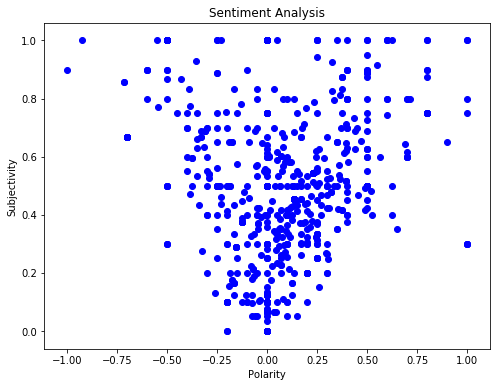

In [63]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df_SentimentAnalysis.shape[0]):
  plt.scatter(df_SentimentAnalysis["Polarity"][i], df_SentimentAnalysis["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

It looks like the majority of the tweets are positive, as many of the points are on the right side of the polarity at value 0.00.

### Sentiment Scores

Display the percentage of positive tweets

In [64]:

ptweets = df_SentimentAnalysis[df_SentimentAnalysis.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

37.5

Display the percentage of negative tweets

In [65]:

ntweets = df_SentimentAnalysis[df_SentimentAnalysis.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

20.0

Plotting and visualizing the counts of 

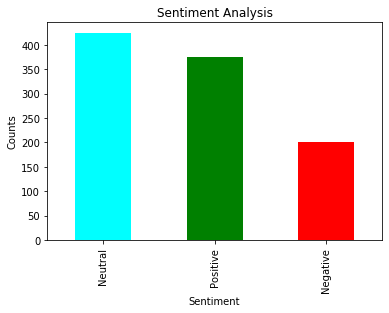

In [66]:

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_SentimentAnalysis['Analysis'].value_counts().plot(kind = 'bar' , color=['cyan', 'green', 'red'])
plt.show()

As we analyze from the above bar graph, Neutral tweets and positive tweets are more compared to negative tweets.

### Network Analysis

For our final project, we intend to import the tweets using tweepy to check how people are responding about Trump Administration's handling for COVID-19. We will import the data first and then create sentiment analysis on that with reference to different aspects such as mask and hand sanitization policies, ventilations, travel bans, etc. We also want to create network analysis to find out the clusters from data. Although we wanted to import large enough dataset from twitter to come up with a reliable analysis but accessibility is an issue with twitter and we might not be able to get more than 1000 tweets. 

In [74]:
# loading libraries
import tweepy
from tweepy import OAuthHandler
import networkx as nx
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import json
#import nxviz as nv

Using tweepy we are going to extract the data regarding covid-19 from Trump Administration along with their replies from people in US. 

In [75]:
# Getting access to twitter
consumer_key = 'mT2zRRcMnlSiqkN130v2w8mCL'
consumer_secret = '0APlMqJY83HLC2opaBTi2wby0ONO3vApTeoc7Z2HMC3RuKJTGm'
access_token = '1013888021731643392-88W3ct7k8FcG0d1lfsM1O7m2gLsQN6'
access_secret = '8SpqLPEIHNYqihfCzkCOKPJukypUsN63CtdwOoYz14sxd'

In [76]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [77]:
# Adding parameters
search_words = '#COVID OR #Corona OR #COVID-19'
#search_words = '#COVID'
date_since = "2019-12-01"


In [78]:
# Getting data
tweets = tweepy.Cursor(api.search,
                      q= search_words,
                      lang="en",
                      since= date_since).items(1000)
if tweets:
    print("Twitter is connected successfully")

Twitter is connected successfully


In [79]:
# Converting the tweets into dataframe
#tweet_data = [[ "'" + str(tweet.id), tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]
#tweets_df = pd.DataFrame(data = tweet_data,
                        #columns=['tweet_id', 'created_at', 'user', "location", "text"])
#tweets_df

IndentationError: unexpected indent (<ipython-input-79-f599e929854a>, line 4)

In [80]:
# Converting the tweets into dataframe
tweet_data = [[tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]
tweets_df = pd.DataFrame(data = tweet_data,
                        columns=['user', "location", "replies"])

# Extracting the user names of people who tweeted back 
tweets_df = tweets_df[tweets_df['replies'].str.contains("RT")]
tweets_df['replies'] = tweets_df['replies'].str.extract('([\\w @]+)')
tweets_df['replies'] = tweets_df['replies'].str.replace('RT ', '')
tweets_df['replies'] = tweets_df['replies'].str.replace('@', '')
tweets_df
tweets_df.head(20)

,user,location,replies
0,_fairrlylocal,SUNNY SAN DIEGO,_orabora
1,Transbiologist1,"Stockholm, Sverige",Refugees_Gr
2,xtraordinerdy,"San Diego, CA",alfredwkng
4,syipoh,EXO's Universe,mhdksafa
5,DrPMilcetich,"Aurora, Ohio",PortageCoHealth
6,kravtodd,,drdavidsamadi
7,JaquandreK,,_orabora
8,BartoliOn,USA,brithume
9,EiHip,,JamesGleick
10,lecraynay_,"Lynwood, CA",_orabora


In [81]:
# Importing data into network using from_pandas_edgelist 
G_rt = nx.from_pandas_edgelist(tweets_df,
                              source= 'user',
                              target='replies',
                              create_using= nx.DiGraph())


In [82]:
# Calculating the nodes and edges
print("Total nodes are ", len(G_rt.nodes()))
print("Total edges are ", len(G_rt.edges()))

Total nodes are  1153
Total edges are  818


In [83]:
# Creating list of top influential nodes
cal = pd.DataFrame()
cal['n'] = nx.degree_centrality(G_rt).values()
cal.index = list(G_rt)
cal = cal.sort_values('n', ascending=False)
cal = cal.head(10)
print(cal)

# Dictionary of top 10 nodes
labels= {}
for node in G_rt.nodes():
    if node in cal.index:
        labels[node] = node

                       n
KeishaBottoms   0.096354
_orabora        0.052083
mhdksafa        0.044271
alfredwkng      0.033854
ProjectLincoln  0.023438
ThePubliusUSA   0.014757
drdavidsamadi   0.008681
brithume        0.007812
CNN             0.007812
tomaskenn       0.005208


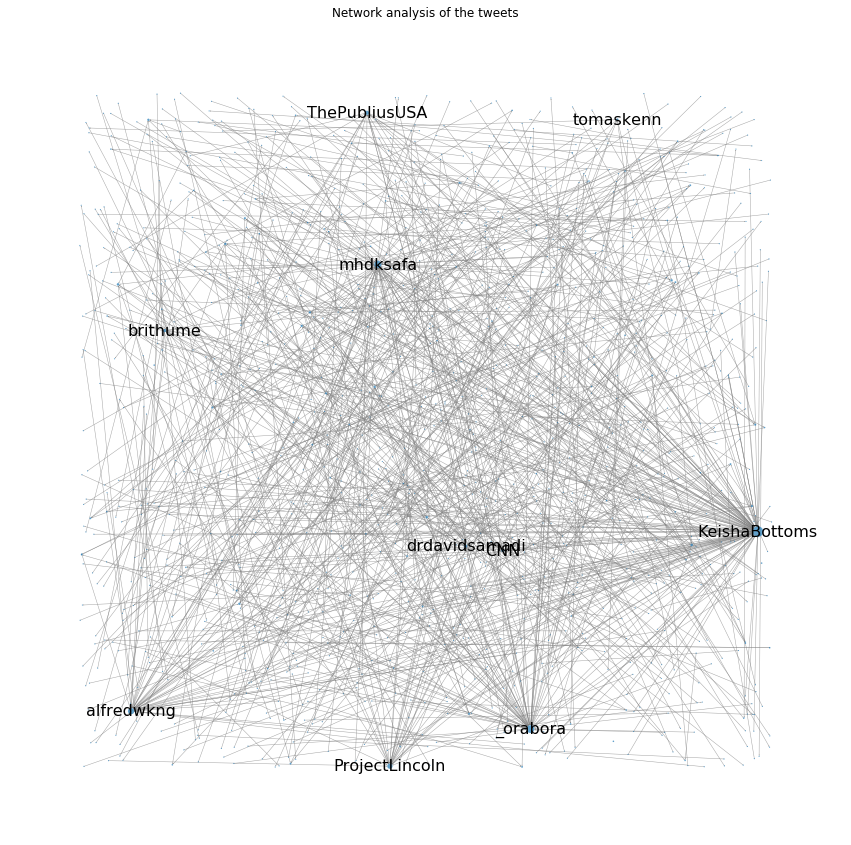

In [84]:
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1] for x in G_rt.degree()]

# Draw metwork
plt.figure(figsize=(15,15))
nx.draw_networkx(G_rt, pos,
                 with_labels=False,
                 node_size= sizes,
                 width=0.5, 
                 alpha=0.7,
                 arrowsize=1,
                 linewidths=0.1,
                 edge_color='Gray', seed=2)
nx.draw_networkx_labels(G_rt, pos, labels, font_size=16, font_color='black')
plt.title('Network analysis of the tweets')
plt.axis('off');plt.show()


In [85]:
# Calculations

# Creating dataframe with calculations
cal = pd.DataFrame()
cal['eigen_centrality'] = nx.eigenvector_centrality(G_rt).values()
cal['degree_centrality'] = nx.degree_centrality(G_rt).values()
cal['between_centrality'] = nx.betweenness_centrality(G_rt).values()
cal['closeness_centrality'] = nx.closeness_centrality(G_rt).values()

# Setting index to nodes
cal.index = list(G_rt)
cal.head(5)

,eigen_centrality,degree_centrality,between_centrality,closeness_centrality
_fairrlylocal,4.214685e-08,0.000868,0.0,0.000000
_orabora,5.820480e-05,0.052083,0.0,0.052083
Transbiologist1,4.214685e-08,0.000868,0.0,0.000000
Refugees_Gr,1.011524e-06,0.000868,0.0,0.000868
xtraordinerdy,4.214685e-08,0.000868,0.0,0.000000


# Degree of Centrality

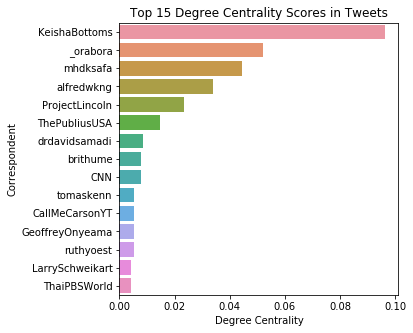

In [86]:
# Top Influential users
cent = nx.degree_centrality(G_rt)
name = []
centrality = []

# Iterating
for key, value in cent.items():
    name.append(key)
    centrality.append(value)

cent = pd.DataFrame()
cent['name'] = name
cent['centrality'] = centrality
cent = cent.sort_values(by= 'centrality', ascending=False)

# Creating plot 
plt.figure(figsize=(5, 5))
_ = sns.barplot(x='centrality', y='name', data=cent[:15], orient='h')
_ = plt.xlabel('Degree Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Degree Centrality Scores in Tweets')
plt.show()

JudgeJeannine, orabora, drdavidsamadi and CNN are the top most influential users among the network. Next we will see betweenness centrality which measures the degree to which each node is the 'single point of contact', it means between other nodes or cliques. 

# Betweenness Centrality

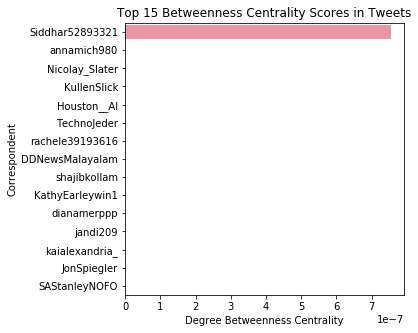

In [87]:
between = nx.betweenness_centrality(G_rt)
name = []
betweenness = []

for key, value in between.items():
    name.append(key)
    betweenness.append(value)

bet = pd.DataFrame()
bet['name'] = name
bet['betweenness'] = betweenness
bet = bet.sort_values(by='betweenness', ascending=False)


plt.figure(figsize=(5,5))
_ = sns.barplot(x='betweenness', y='name', data=bet[:15], orient='h')
_ = plt.xlabel('Degree Betweenness Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Betweenness Centrality Scores in Tweets')
plt.show()

As we said, it measures the number of times a node lies on the shortest path between other nodes. It shows which nodes are 'bridges' between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one. Unfortunately, due to high number of nodes and limited access to tweets (n=1000) there is no bridge between nodes in a network but it is very useful fore finding the individuals who influence the flow around a system.

Let's move ahead and calculate closeness of centrality. It scores each node based on their closeness to all other nodes in the network.

# Closeness of Centrality

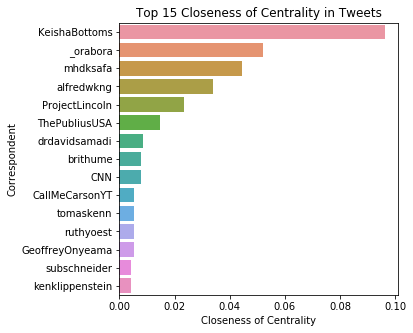

In [88]:
close = nx.closeness_centrality(G_rt)
name = []
closeness = []

for key, value in close.items():
    name.append(key)
    closeness.append(value)

clo = pd.DataFrame()
clo['name'] = name
clo['closeness'] = closeness
clo = clo.sort_values(by='closeness', ascending=False)


plt.figure(figsize=(5,5))
_ = sns.barplot(x='closeness', y='name', data=clo[:15], orient='h')
_ = plt.xlabel('Closeness of Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Closeness of Centrality in Tweets')
plt.show()

Closeness centrality calculates the shortest paths between all nodes. It is very useful to find the individuals who are best placed to influence the entire network quickly. It helps finding 'broadcasters' but in a highly connected network, you will often find all nodes have a similar score.  What may be more useful is using closeness to find influencers in a single cluster